http://docs.pymc.io/notebooks/rugby_analytics.html

In [13]:
!date

import numpy as np
import pandas as pd
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
%matplotlib inline
import pymc3 as pm, theano.tensor as tt

Sun Nov 25 08:19:46 UTC 2018


In [2]:
def calc_period_score(period_data, home, number_of_periods):

    if period_data != period_data:
        return None
    
    periods = period_data.split(",")[0:number_of_periods]
    score = 0
    index = 1
    
    if home:
        index = 0
        
    for p in periods:
        score += int(p.strip().split("-")[index])
        
    return score

In [3]:
df = pd.read_csv('2017_2018.csv')
df

,DATUM,HEMMA,BORTA,HS,-,VS,DEC,PERIOD,ARENA,ATT
0,2018-03-10,Skellefteå,Karlskrona,-,-,-,-,NaN,Skellefteå Kraft Arena,-
1,2018-03-10,Örebro,Djurgården,-,-,-,-,NaN,Behrn Arena,-
2,2018-03-10,Rögle,Luleå,-,-,-,-,NaN,Lindab Arena,-
3,2018-03-10,Färjestad,HV71,-,-,-,-,NaN,Löfbergs Arena,-
4,2018-03-10,Linköping,Växjö,-,-,-,-,NaN,Saab Arena,-
5,2018-03-10,Frölunda,Brynäs,-,-,-,-,NaN,Scandinavium,-
6,2018-03-10,Malmö,Mora,-,-,-,-,NaN,Malmö Arena,-
7,2018-03-08,Luleå,Skellefteå,-,-,-,-,NaN,Coop Norrbotten Arena,-
8,2018-03-08,Mora,Örebro,-,-,-,-,NaN,Jalas Arena,-
9,2018-03-08,Brynäs,Linköping,-,-,-,-,NaN,Gavlerinken Arena,-


In [4]:
df = pd.read_csv('2017_2018.csv')
df['HS'] = df['PERIOD'].apply(lambda x: calc_period_score(x, True, 3))
df['VS'] = df['PERIOD'].apply(lambda x: calc_period_score(x, False, 3))

df = df[['DATUM','HEMMA', 'BORTA', 'HS', 'VS']]
df.columns = ['date','home_team','away_team','home_score','away_score']
df.head(5)
#df_all_games = df.copy()
#df = df[df['home_score'] != '-']
#df_games = df.copy()

,date,home_team,away_team,home_score,away_score
0,2018-03-10,Skellefteå,Karlskrona,NaN,NaN
1,2018-03-10,Örebro,Djurgården,NaN,NaN
2,2018-03-10,Rögle,Luleå,NaN,NaN
3,2018-03-10,Färjestad,HV71,NaN,NaN
4,2018-03-10,Linköping,Växjö,NaN,NaN


In [5]:

teams = df.home_team.unique()
teams = pd.DataFrame(teams, columns=['team'])
teams['i'] = teams.index
df = pd.merge(df, teams, left_on='home_team', right_on='team', how='left')
df = df.rename(columns = {'i': 'i_home'}).drop('team', 1)

df = pd.merge(df, teams, left_on='away_team', right_on='team', how='left')
df = df.rename(columns = {'i': 'i_away'}).drop('team', 1)

df_all_games = df.copy()
df_all_games

#df = df[df['home_score'] != '-']
df = df.dropna()

observed_home_goals = df.home_score.values
observed_away_goals = df.away_score.values

home_team = df.i_home.values
away_team = df.i_away.values

num_teams = len(df.i_home.drop_duplicates())
num_games = len(home_team)

df_played_games = df.copy()
#g = df.groupby('i_away')
#att_starting_points = np.log(g.away_score.mean())
#g = df.groupby('i_home')
#def_starting_points = -np.log(g.away_score.mean())

In [6]:
df_played_games

,date,home_team,away_team,home_score,away_score,i_home,i_away
162,2017-12-26,Växjö,Skellefteå,3.0,2.0,11,0
163,2017-12-26,Brynäs,Färjestad,4.0,2.0,9,3
164,2017-12-26,Mora,Djurgården,0.0,4.0,8,10
165,2017-12-26,Luleå,Karlskrona,7.0,1.0,7,12
166,2017-12-26,Rögle,Linköping,2.0,4.0,2,4
167,2017-12-26,HV71,Örebro,5.0,2.0,13,1
168,2017-12-26,Malmö,Frölunda,5.0,0.0,6,5
169,2017-12-21,Mora,HV71,2.0,4.0,8,13
170,2017-12-21,Djurgården,Luleå,1.0,1.0,10,7
171,2017-12-21,Växjö,Brynäs,3.0,3.0,11,9


In [7]:
model = pm.Model()
with pm.Model() as model:
    # global model parameters
    home = pm.Flat('home')
    sd_att = pm.HalfStudentT('sd_att', nu=3, sd=2.5)
    sd_def = pm.HalfStudentT('sd_def', nu=3, sd=2.5)
    intercept = pm.Flat('intercept')

    # team-specific model parameters
    atts_star = pm.Normal("atts_star", mu=0, sd=sd_att, shape=num_teams)
    defs_star = pm.Normal("defs_star", mu=0, sd=sd_def, shape=num_teams)

    atts = pm.Deterministic('atts', atts_star - tt.mean(atts_star))
    defs = pm.Deterministic('defs', defs_star - tt.mean(defs_star))
    home_theta = tt.exp(intercept + home + atts[home_team] + defs[away_team])
    away_theta = tt.exp(intercept + atts[away_team] + defs[home_team])

    # likelihood of observed data
    home_points = pm.Poisson('home_points', mu=home_theta, observed=observed_home_goals)
    away_points = pm.Poisson('away_points', mu=away_theta, observed=observed_away_goals)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [defs_star, atts_star, intercept, sd_def, sd_att, home]
100%|██████████| 5000/5000 [05:21<00:00, 15.56it/s]
/opt/conda/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/opt/conda/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4 divergences after tuning. Increase `target_accept`

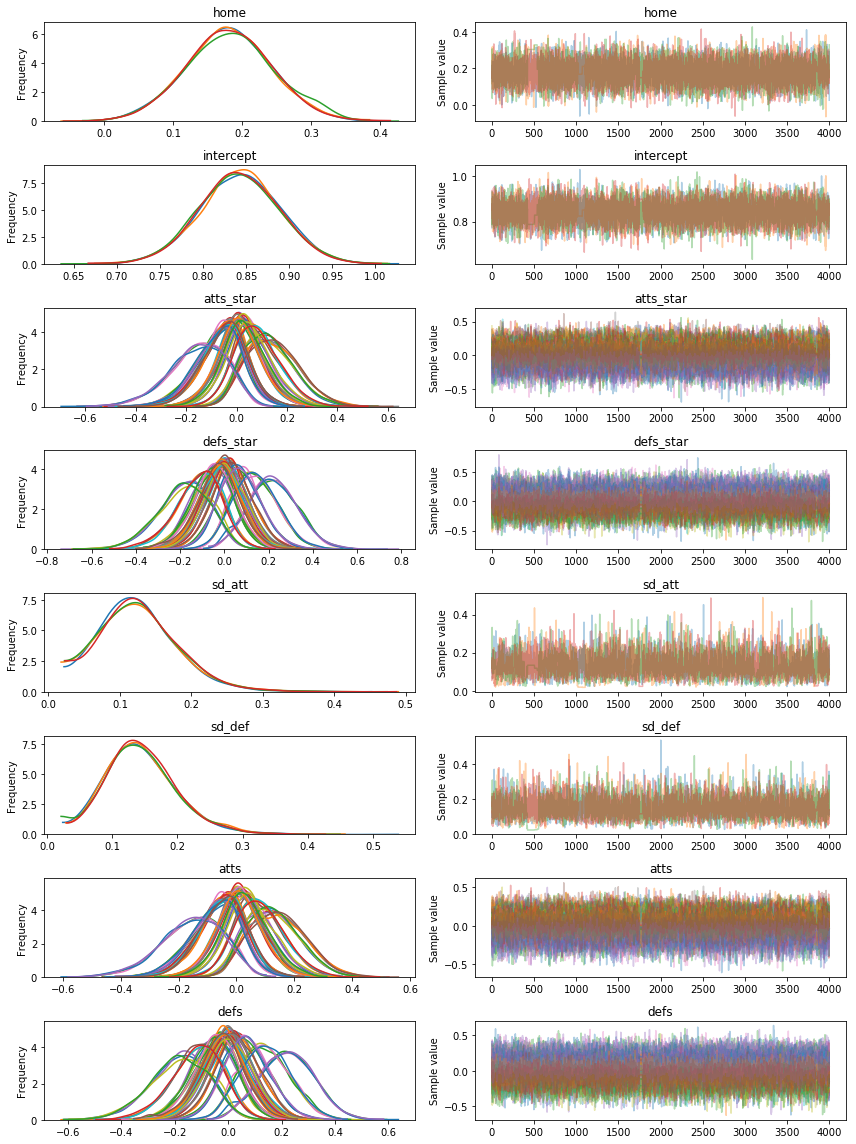

In [9]:
with model:
    trace = pm.sample(4000, tune=1000, cores=1, chains = 4)
    pm.traceplot(trace)

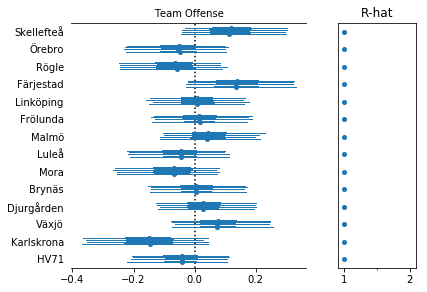

In [10]:
labels = teams['team'].tolist()
pm.forestplot(trace, varnames=['atts'],  ylabels=labels, main="Team Offense")

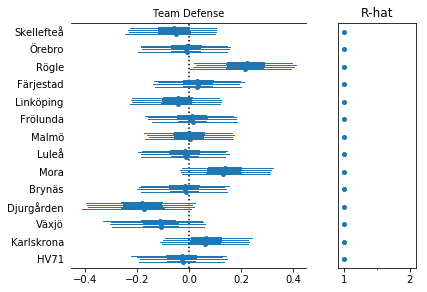

In [11]:
labels = teams['team'].tolist()
pm.forestplot(trace, varnames=['defs'],  ylabels=labels, main="Team Defense")

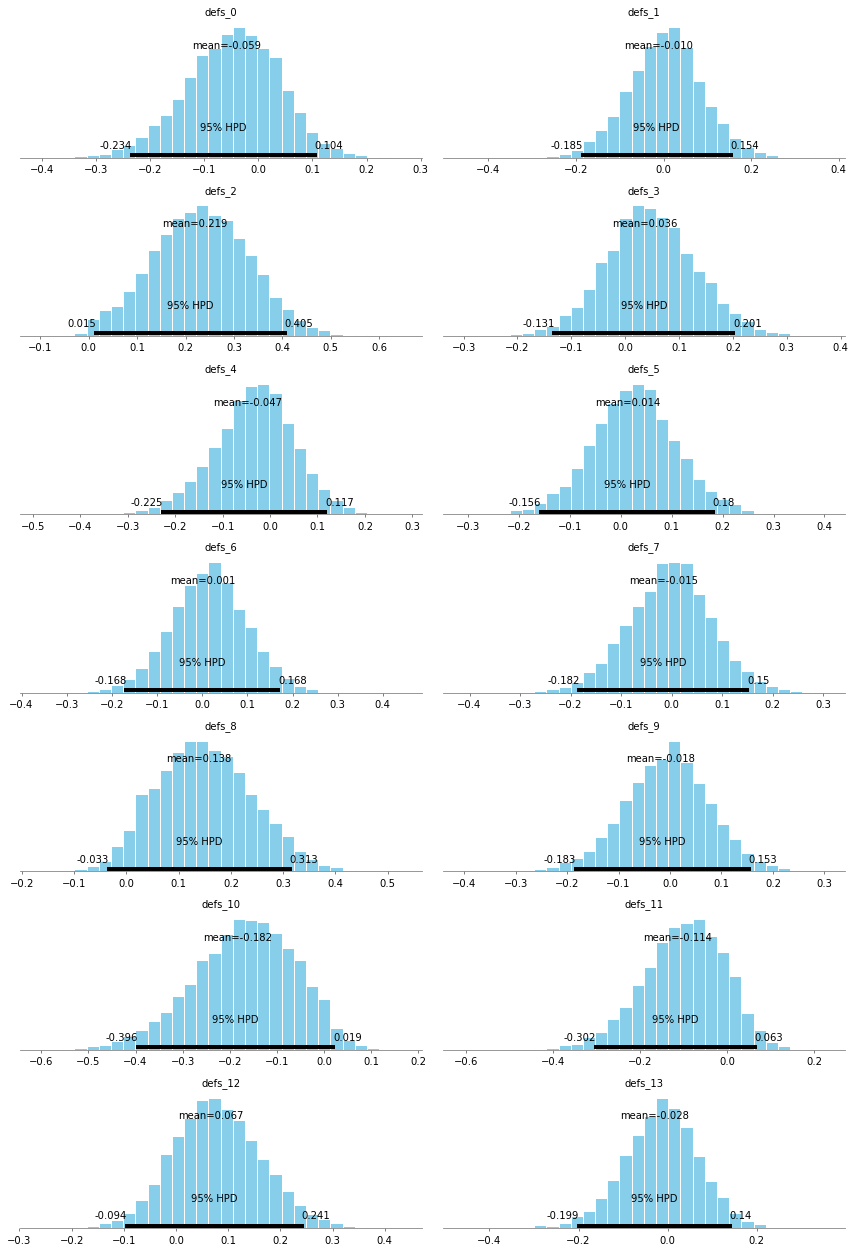

In [12]:
pm.plot_posterior(trace, varnames=['defs']);

In [32]:
df_trace = pm.trace_to_dataframe(trace)

In [33]:
pd.concat([df_trace.head(5),df_trace.tail(5)])

,home,intercept,atts_star__0,atts_star__1,atts_star__2,atts_star__3,atts_star__4,atts_star__5,atts_star__6,atts_star__7,...,defs__4,defs__5,defs__6,defs__7,defs__8,defs__9,defs__10,defs__11,defs__12,defs__13
0,0.268209,0.762890,0.100820,-0.229822,-0.118929,0.270418,0.206776,0.019151,0.218650,0.003004,...,-0.135829,0.117340,0.080765,-0.069071,0.184544,-0.055703,-0.245606,-0.233744,0.164879,-0.011213
1,0.123589,0.883792,0.205115,0.156911,0.126397,0.346590,-0.192894,0.135759,0.205758,0.073582,...,-0.054572,0.005309,0.067320,-0.156733,0.058346,0.096534,-0.399250,-0.138066,0.120872,-0.048622
2,0.132004,0.851445,0.189090,0.145766,0.076870,0.483633,-0.059598,0.081112,0.335214,-0.042788,...,-0.079245,-0.108940,-0.003694,-0.005519,0.199241,-0.058059,-0.261131,-0.002538,0.145446,0.038350
3,0.109019,0.936606,0.175139,-0.058233,0.005689,0.432755,0.019285,0.011931,0.325075,-0.072904,...,-0.096242,0.100371,-0.003606,-0.101943,0.047231,0.106319,-0.030145,-0.095685,-0.006570,0.039695
4,0.263495,0.775105,0.305064,-0.053399,-0.077147,0.120884,0.108669,0.197807,-0.071252,0.023638,...,-0.058700,-0.052039,0.028545,0.064536,0.277487,-0.189442,-0.356867,-0.174884,0.157989,-0.093527
3995,0.219173,0.806253,0.209811,0.028534,-0.028271,0.240802,0.202580,0.122591,0.115255,-0.141857,...,-0.016136,0.045968,-0.005428,-0.056950,0.101173,0.076857,-0.133905,-0.090206,0.073256,0.053356
3996,0.158932,0.858680,0.231566,0.102016,0.049154,0.141490,0.104682,0.162935,0.093371,-0.168174,...,0.030551,0.156842,-0.094748,-0.041154,0.015333,0.058902,-0.121515,-0.106385,0.031096,-0.025762
3997,0.140244,0.823305,0.285027,0.098703,0.169226,0.231775,0.114341,0.130142,0.085393,-0.181648,...,-0.011551,0.107886,0.049832,-0.103724,-0.012651,0.096773,-0.187512,-0.111848,0.059148,-0.048714
3998,0.202135,0.852737,0.094806,-0.032927,-0.168000,0.048366,-0.097700,-0.024921,-0.024362,-0.044566,...,-0.064629,0.172735,0.161162,-0.144086,0.058874,0.114753,-0.316794,-0.197048,0.129522,-0.132309
3999,0.194983,0.814672,0.146318,-0.097890,-0.115722,0.104094,0.069874,0.122224,0.098721,-0.034789,...,-0.029675,-0.125782,-0.005394,-0.031005,0.119550,0.035914,-0.154171,-0.090221,0.087027,-0.015160


In [34]:
df_all_games

,date,home_team,away_team,home_score,away_score,i_home,i_away
0,2018-03-10,Skellefteå,Karlskrona,NaN,NaN,0,12
1,2018-03-10,Örebro,Djurgården,NaN,NaN,1,10
2,2018-03-10,Rögle,Luleå,NaN,NaN,2,7
3,2018-03-10,Färjestad,HV71,NaN,NaN,3,13
4,2018-03-10,Linköping,Växjö,NaN,NaN,4,11
5,2018-03-10,Frölunda,Brynäs,NaN,NaN,5,9
6,2018-03-10,Malmö,Mora,NaN,NaN,6,8
7,2018-03-08,Luleå,Skellefteå,NaN,NaN,7,0
8,2018-03-08,Mora,Örebro,NaN,NaN,8,1
9,2018-03-08,Brynäs,Linköping,NaN,NaN,9,4


In [35]:
def simulate_season():
    """
    Simulate a season once, using one random draw from the mcmc chain. 
    """
    num_samples = trace['atts'].shape[0]
    draw = np.random.randint(0, num_samples)
    atts_draw = pd.DataFrame({'att': trace['atts'][draw, :],})
    defs_draw = pd.DataFrame({'def': trace['defs'][draw, :],})
    home_draw = trace['home'][draw]
    intercept_draw = trace['intercept'][draw]
    season = df_all_games.copy()
    season = pd.merge(season, atts_draw, left_on='i_home', right_index=True)
    season = pd.merge(season, defs_draw, left_on='i_home', right_index=True)
    season = season.rename(columns = {'att': 'att_home', 'def': 'def_home'})
    season = pd.merge(season, atts_draw, left_on='i_away', right_index=True)
    season = pd.merge(season, defs_draw, left_on='i_away', right_index=True)
    season = season.rename(columns = {'att': 'att_away', 'def': 'def_away'})
    season['home'] = home_draw
    season['intercept'] = intercept_draw
    season['home_theta'] = season.apply(lambda x: np.exp(x['intercept'] + 
                                                           x['home'] + 
                                                           x['att_home'] + 
                                                           x['def_away']), axis=1)
    season['away_theta'] = season.apply(lambda x: np.exp(x['intercept'] + 
                                                           x['att_away'] + 
                                                           x['def_home']), axis=1)
    season['home_goals'] = season.apply(lambda x: np.random.poisson(x['home_theta']), axis=1)
    season['away_goals'] = season.apply(lambda x: np.random.poisson(x['away_theta']), axis=1)
    season['home_outcome'] = season.apply(lambda x: 'win' if x['home_goals'] > x['away_goals'] else 
                                                    'loss' if x['home_goals'] < x['away_goals'] else 'draw', axis=1)
    season['away_outcome'] = season.apply(lambda x: 'win' if x['home_goals'] < x['away_goals'] else 
                                                    'loss' if x['home_goals'] > x['away_goals'] else 'draw', axis=1)
    season = season.join(pd.get_dummies(season.home_outcome, prefix='home'))
    season = season.join(pd.get_dummies(season.away_outcome, prefix='away'))
    return season


def create_season_table(season):
    """
    Using a season dataframe output by simulate_season(), create a summary dataframe with wins, losses, goals for, etc.
    
    """
    g = season.groupby('i_home')    
    home = pd.DataFrame({'home_goals': g.home_goals.sum(),
                         'home_goals_against': g.away_goals.sum(),
                         'home_wins': g.home_win.sum(),
                         'home_draws': g.home_draw.sum(),
                         'home_losses': g.home_loss.sum()
                         })
    g = season.groupby('i_away')    
    away = pd.DataFrame({'away_goals': g.away_goals.sum(),
                         'away_goals_against': g.home_goals.sum(),
                         'away_wins': g.away_win.sum(),
                         'away_draws': g.away_draw.sum(),
                         'away_losses': g.away_loss.sum()
                         })
    df = home.join(away)
    df['wins'] = df.home_wins + df.away_wins
    df['draws'] = df.home_draws + df.away_draws
    df['losses'] = df.home_losses + df.away_losses
    df['points'] = df.wins * 3 + df.draws
    df['gf'] = df.home_goals + df.away_goals
    df['ga'] = df.home_goals_against + df.away_goals_against
    df['gd'] = df.gf - df.ga
    df = pd.merge(teams, df, left_on='i', right_index=True)
    df = df.sort_index(by='points', ascending=False)
    df = df.reset_index()
    df['position'] = df.index + 1
    df['champion'] = (df.position == 1).astype(int)
    df['qualified_for_CL'] = (df.position < 5).astype(int)
    df['relegated'] = (df.position > 17).astype(int)
    return df  
    
def simulate_seasons(n=10):
    dfs = []
    for i in range(n):
        s = simulate_season()
        print( s.head(3))
        t = create_season_table(s)
        t['iteration'] = i
        dfs.append(t)
    return pd.concat(dfs, ignore_index=True)

def simulate_date_outcomes(n=3):
    dfs = []
    for i in range(n):
        if (i % 100 == 0):
            print("Simulation number: {}".format(i))
        s = simulate_season()
        #s = s[s['date'] == date]
        s['iteration'] = i
        s = s[['date','home_team', 'away_team','home_draw', 'home_loss', 'home_win']]
        dfs.append(s)
        
    df = pd.concat(dfs, ignore_index=True)
    df = df.groupby(['date','home_team', 'away_team']).sum()
    return df

In [36]:
df = simulate_date_outcomes(1000)
df_simul = df.copy()

Simulation number: 0
Simulation number: 100
Simulation number: 200
Simulation number: 300
Simulation number: 400
Simulation number: 500
Simulation number: 600
Simulation number: 700
Simulation number: 800
Simulation number: 900


In [37]:
12

12

In [40]:
df = df_simul.copy()
df = df.reset_index()
df = df[df['date'] == '2017-12-28'].head(20)

df['home_win_odds'] = 1000/df['home_win']
df['home_draw_odds'] = 1000/df['home_draw']
df['away_win_odds'] = 1000/df['home_loss']

df

,date,home_team,away_team,home_draw,home_loss,home_win,home_win_odds,home_draw_odds,away_win_odds
202,2017-12-28,Färjestad,Malmö,164.0,328.0,508.0,1.968504,6.097561,3.048780
203,2017-12-28,HV71,Växjö,158.0,420.0,422.0,2.369668,6.329114,2.380952
204,2017-12-28,Karlskrona,Brynäs,206.0,454.0,340.0,2.941176,4.854369,2.202643
205,2017-12-28,Linköping,Djurgården,171.0,415.0,414.0,2.415459,5.847953,2.409639
206,2017-12-28,Luleå,Mora,179.0,271.0,550.0,1.818182,5.586592,3.690037
207,2017-12-28,Skellefteå,Rögle,121.0,153.0,726.0,1.377410,8.264463,6.535948
208,2017-12-28,Örebro,Frölunda,197.0,360.0,443.0,2.257336,5.076142,2.777778


NameError: name 'dju' is not defined

In [ ]:
import matplotlib as plt
import seaborn as sns

In [ ]:
1000./600

In [ ]:
ax = simuls.points[simuls.team == 'Rögle'].hist(figsize=(7,5))
median = simuls.points[simuls.team == 'Rögle'].median()
ax.set_title('xx')
ax.plot([median, median], ax.get_ylim())
#plt.annotate('Median: %s' % median, xy=(median + 1, ax.get_ylim()[1]-10))
print (median)

In [ ]:
df


In [ ]:
import matplotlib.pyplot as plt
g = simuls.groupby('team')
season_hdis = pd.DataFrame({'points_lower': g.points.quantile(.05),
                            'points_upper': g.points.quantile(.95),
                            'goals_for_lower': g.gf.quantile(.05),
                            'goals_for_median': g.gf.median(),
                            'goals_for_upper': g.gf.quantile(.95),
                            'goals_against_lower': g.ga.quantile(.05),
                            'goals_against_upper': g.ga.quantile(.95),
                            })
#season_hdis = pd.merge(season_hdis, df, left_index=True, right_on='team')
column_order = ['points_lower',  'points_upper', 
                'goals_for_lower', 'goals_for_median', 'goals_for_upper',
                'goals_against_lower',  'goals_against_upper',]
season_hdis = season_hdis[column_order]
season_hdis['relative_goals_upper'] = season_hdis.goals_for_upper - season_hdis.goals_for_median
season_hdis['relative_goals_lower'] = season_hdis.goals_for_median - season_hdis.goals_for_lower
season_hdis = season_hdis.reset_index()
season_hdis['x'] = season_hdis.index + .5
season_hdis

fig, axs = plt.subplots(figsize=(10,6))
#axs.scatter(season_hdis.x, season_hdis.GF, c=sns.palettes.color_palette()[4], zorder = 10, label='Actual Goals For')
axs.errorbar(season_hdis.x, season_hdis.goals_for_median, 
             yerr=(season_hdis[['relative_goals_lower', 'relative_goals_upper']].values).T, 
             fmt='s', c=sns.palettes.color_palette()[5], label='Simulations')
axs.set_title('Actual Goals For, and 90% Interval from Simulations, by Team')
axs.set_xlabel('Team')
axs.set_ylabel('Goals Scored')
axs.set_xlim(0, 20)
axs.legend()
_= axs.set_xticks(season_hdis.index + .5)
_= axs.set_xticklabels(season_hdis['team'].values, rotation=45)


In [ ]:
df_winner = simuls[simuls['champion'] ==1].copy()
calc_odds = 1000/df_winner.groupby('team').count()['index'].sort_values(ascending = False)
calc_odds

In [ ]:
res = '''4,60
Växjö Lakers
5,90
Frölunda
7,00
Skellefteå
7,50
Färjestad
8,00
HV71
11,00
Djurgården
11,50
Malmö
15,00
Linköping
20,00
Luleå
21,00
Brynäs
35,00
Örebro
125,00
Karlskrona
125,00
Rögle
125,00
Mora'''
res = res.replace(",",'.')
res = res.split("\n")
odds = pd.DataFrame(columns = ['team', 'odds'])
for i in range(0,len(res), 2):
    dfi = pd.DataFrame([[res[i+1],res[i]]], columns = ['team', 'odds'])
    odds = odds.append(dfi)
    
odds = odds.set_index('team')

In [ ]:
df = odds.join(calc_odds)
df.columns = ['odds', 'calc_odds']
df['odds'] = df['odds'].astype(float)
df['diff'] = df['odds'] - df['calc_odds']
df = df.sort_values('diff')
df

In [ ]:
simuls

In [ ]:
df_res = df.copy()
df_res

In [ ]:
from random import random
round(random()*100,0)+1

In [ ]:
df = simulate_season()
df = df.sort_values('date')
df = df.drop(['home_outcome', 'away_outcome', 'home_draw', 'home_loss', 'home_win', 'away_draw', 'away_loss', 'away_win'],1)
df